In [1]:
from keras.datasets import mnist
(train_X,train_Y), (test_X,test_Y) = mnist.load_data()

In [2]:
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
import numpy as np

classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [4]:
train_X
train_Y
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
from keras.utils import normalize
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = normalize(train_X, axis=1)
test_X = normalize(test_X, axis=1)

In [6]:
from keras.utils import to_categorical

train_Y_argmax = to_categorical(train_Y)
test_Y_argmax = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to argmax:', train_Y_argmax[0])

Original label: 5
After conversion to argmax: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_argmax, test_size=0.2, random_state=13)
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [8]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
batch_size = 200
epochs = 10
learn_rate = 0.01
k_size = 3
feature_map = 32
pooling_size = 10

In [9]:
model = Sequential()
model.add(Conv2D(feature_map, kernel_size=(k_size, k_size),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D((pooling_size, pooling_size),padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [10]:
from keras import losses
from keras import optimizers

model.compile(loss=losses.categorical_crossentropy, 
              optimizer=optimizers.Adam(learning_rate=learn_rate),
              metrics=['accuracy'])


train = model.fit(train_X, train_label, batch_size = batch_size, epochs=epochs, validation_data = (valid_X, valid_label))

Epoch 1/10
240/240 [==============================] - 7s 29ms/step - loss: 0.6113 - accuracy: 0.8039 - val_loss: 0.2876 - val_accuracy: 0.9128
Epoch 2/10
240/240 [==============================] - 6s 27ms/step - loss: 0.2968 - accuracy: 0.9047 - val_loss: 0.2224 - val_accuracy: 0.9290
Epoch 3/10
240/240 [==============================] - 7s 28ms/step - loss: 0.2367 - accuracy: 0.9256 - val_loss: 0.1855 - val_accuracy: 0.9420
Epoch 4/10
240/240 [==============================] - 7s 28ms/step - loss: 0.2082 - accuracy: 0.9337 - val_loss: 0.1787 - val_accuracy: 0.9429
Epoch 5/10
240/240 [==============================] - 6s 27ms/step - loss: 0.1860 - accuracy: 0.9404 - val_loss: 0.1578 - val_accuracy: 0.9504
Epoch 6/10
240/240 [==============================] - 7s 28ms/step - loss: 0.1719 - accuracy: 0.9451 - val_loss: 0.1666 - val_accuracy: 0.9474
Epoch 7/10
240/240 [==============================] - 7s 28ms/step - loss: 0.1643 - accuracy: 0.9480 - val_loss: 0.1531 - val_accuracy: 0.9538

In [11]:
test_eval = model.evaluate(test_X, test_Y_argmax)

313/313 [==============================] - 1s 3ms/step - loss: 0.1296 - accuracy: 0.9571


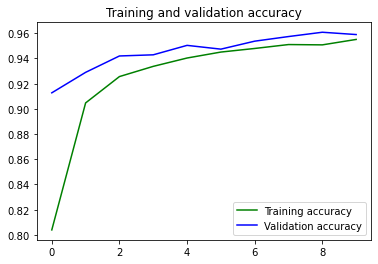

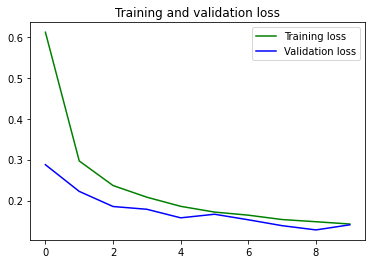

In [12]:
import matplotlib.pyplot as plt

accuracy = train.history['accuracy']
val_accuracy = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', color="g", label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', color="g", label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
batch_size = 200
epochs = 10
learn_rate = 0.01

model_mlp = Sequential()
model_mlp.add(Flatten())
model_mlp.add(Dense(128, activation='relu'))
model_mlp.add(Dropout(0.25))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dropout(0.25))
model_mlp.add(Dense(10, activation='softmax'))

In [14]:
model_mlp.compile(loss=losses.categorical_crossentropy, 
              optimizer=optimizers.Adam(learning_rate=learn_rate),
              metrics=['accuracy'])


train_mlp = model_mlp.fit(train_X, train_label, batch_size = batch_size, epochs=epochs, validation_data = (valid_X, valid_label))

Epoch 1/10
240/240 [==============================] - 1s 3ms/step - loss: 0.3740 - accuracy: 0.8861 - val_loss: 0.1639 - val_accuracy: 0.9515
Epoch 2/10
240/240 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9391 - val_loss: 0.1304 - val_accuracy: 0.9606
Epoch 3/10
240/240 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9517 - val_loss: 0.1330 - val_accuracy: 0.9635
Epoch 4/10
240/240 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9560 - val_loss: 0.1307 - val_accuracy: 0.9627
Epoch 5/10
240/240 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9609 - val_loss: 0.1230 - val_accuracy: 0.9665
Epoch 6/10
240/240 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.9608 - val_loss: 0.1146 - val_accuracy: 0.9653
Epoch 7/10
240/240 [==============================] - 0s 2ms/step - loss: 0.1190 - accuracy: 0.9649 - val_loss: 0.1214 - val_accuracy: 0.9663
Epoch 

In [15]:
test_eval = model_mlp.evaluate(test_X, test_Y_argmax)

313/313 [==============================] - 0s 824us/step - loss: 0.1174 - accuracy: 0.9695


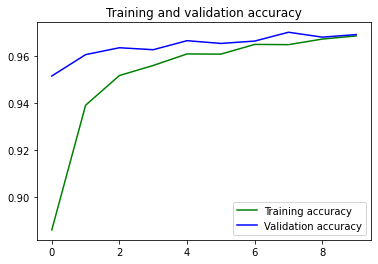

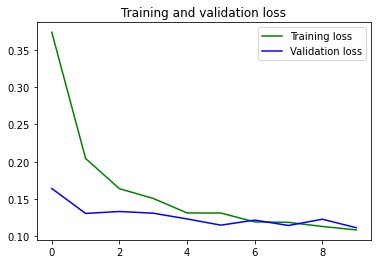

In [16]:
accuracy = train_mlp.history['accuracy']
val_accuracy = train_mlp.history['val_accuracy']
loss = train_mlp.history['loss']
val_loss = train_mlp.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', color="g", label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', color="g", label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()